In [2]:
import pandas as pd

In [4]:
#subimos las bases de datos
df_2004 = pd.read_stata("Individual_t104.dta")
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [6]:
!pip install pyreadstat

import pyreadstat

df, meta = pyreadstat.read_dta("Individual_t104.dta")

In [8]:
df_2004["region"].unique()

['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']

In [10]:
df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]

In [12]:
#punto2a
df_a = pd.read_stata("Individual_t104.dta")
print(df_a.shape)

df_b = pd.read_excel("usu_individual_T124.xlsx")
print(df_b.shape)

df_a_gba = df_a[df_a["region"] == "Gran Buenos Aires"]
df_b_gba = df_b[df_b["REGION"] == "Gran Buenos Aires"]

df = pd.concat([df_a_gba, df_b_gba])
print(df.shape)

(45289, 176)
(46050, 177)
(7647, 352)


In [15]:
variables_2024= ['CAT_INAC' , 'CAT_OCUP','REGION', 'ANO4', 'TRIMESTRE', 'H15', 'PP02I',
                 'ESTADO', 'CH15', 'CH14', 'CH09', 'CH06', 'CH03', 'CH04', 'PP02H']
porcentaje_nan = df_b[variables_2024].isna().mean()* 100
print(porcentaje_nan)

CAT_INAC      0.000000
CAT_OCUP      0.000000
REGION        0.000000
ANO4          0.000000
TRIMESTRE     0.000000
H15           0.000000
PP02I         0.000000
ESTADO        0.000000
CH15          0.000000
CH14         50.495114
CH09          0.000000
CH06          0.000000
CH03          0.000000
CH04          0.000000
PP02H         0.000000
dtype: float64


In [17]:
variables_2004=['cat_inac', 'cat_ocup', 'region','ano4', 'trimestre', 'h15',
 'pp02i', 'estado', 'ch15', 'ch14', 'ch09', 'ch06', 'ch03', 'ch04', 'pp02h']
porcentaje_nan = df_a[variables_2004].isna().mean()* 100
print(porcentaje_nan)

cat_inac     0.0
cat_ocup     0.0
region       0.0
ano4         0.0
trimestre    0.0
h15          0.0
pp02i        0.0
estado       0.0
ch15         0.0
ch14         0.0
ch09         0.0
ch06         0.0
ch03         0.0
ch04         0.0
pp02h        0.0
dtype: float64


In [19]:
#Homogwnizacion de variables
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [21]:
variables_comunes = ['CAT_INAC', 'CAT_OCUP','REGION', 'ANO4', 'TRIMESTRE', 'H15',
                     'PP02I', 'ESTADO', 'CH15', 'CH14', 'CH09', 'CH06', 'CH03', 'CH04', 'PP02H']

In [23]:
#Variable CH04
print("2004:", df_2004['CH04'].unique())
print("2024:", df_2024['CH04'].unique())

2004: ['Varón', 'Mujer']
Categories (2, object): ['Varón' < 'Mujer']
2024: [2 1]


In [31]:
df_2004['CH04'] = df_2004['CH04'].replace({'Varón': 1, 'Mujer': 2}).astype(int)
print(df_2004['CH04'].unique())

[1 2]


In [33]:
#Variable Ch03
print("2004:", df_2004[ 'CH03'].unique())
print("2024:", df_2024[ 'CH03'].unique())

2004: ['Jefe', 'Cónyuge/Pareja', 'Hijo/Hijastro', 'Madre/Padre', 'Otros familiares', 'Hermano', 'Suegro', 'Nieto', 'No familiares', 'Yerno/Nuera']
Categories (10, object): ['Jefe' < 'Cónyuge/Pareja' < 'Hijo/Hijastro' < 'Yerno/Nuera' ... 'Suegro' < 'Hermano' < 'Otros familiares' < 'No familiares']
2024: [ 3  5  1  2 10  4  6  8  7  9]


In [37]:
mapa_ch03_2004_2024 = {
    'Jefe': 3,
    'Cónyuge/Pareja': 5,
    'Hijo/Hijastro': 1,
    'Madre/Padre': 2,
    'Otros familiares': 10,
    'Hermano': 4,
    'Suegro': 6,
    'Nieto': 8,
    'No familiares': 7,
    'Yerno/Nuera': 9
}
df_2004['CH03'] = df_2004['CH03'].replace(mapa_ch03_2004_2024)
print("2004:", df_2004['CH03'].unique())
print("2024:", df_2024['CH03'].unique())

2004: [3, 5, 1, 2, 10, 4, 6, 8, 7, 9]
Categories (10, int64): [3 < 5 < 1 < 9 ... 6 < 4 < 10 < 7]
2024: [ 3  5  1  2 10  4  6  8  7  9]


In [44]:
#Variable PP02H

print("2004:", df_2004[ 'PP02H'].unique())
print("2024:", df_2024[ 'PP02H'].unique())

2004: ['No', 'Sí']
Categories (2, object): ['Sí' < 'No']
2024: ['No' 'Sí']


In [46]:
df_2004['PP02H'] = df_2004['PP02H'].replace({0.0: 'No'})
df_2024['PP02H'] = df_2024['PP02H'].replace({0: 'No', 2: 'Sí', 1: 'Sí'})
print("Valores 2004:", df_2004['PP02H'].unique())
print("Valores 2024:", df_2024['PP02H'].unique())

Valores 2004: ['No', 'Sí']
Categories (2, object): ['Sí' < 'No']
Valores 2024: ['No' 'Sí']


In [48]:
#Variable CH09 
print("2004:", df_2004['CH09'].unique())
print("2024:", df_2024['CH09'].unique())

2004: ['Sí', 'No', 'Menor de 2 años', 'Ns./Nr.']
Categories (4, object): ['Sí' < 'No' < 'Menor de 2 años' < 'Ns./Nr.']
2024: [1 2 3 9]


In [50]:
mapa_ch09 = {
    1: 'Sí',
    2: 'No',
    3: 'Menor de 2 años',
    9: 'Ns./Nr.'
}
df_2024['CH09'] = df_2024['CH09'].replace(mapa_ch09)
df_2004['CH09'] = df_2004['CH09'].astype(str)
df_2024['CH09'] = df_2024['CH09'].astype(str)

print("CH09 - 2004:", df_2004['CH09'].unique())
print("CH09 - 2024:", df_2024['CH09'].unique())

CH09 - 2004: ['Sí' 'No' 'Menor de 2 años' 'Ns./Nr.']
CH09 - 2024: ['Sí' 'No' 'Menor de 2 años' 'Ns./Nr.']


In [56]:
#Variable ESTADO
print("2004:", df_2004['ESTADO'].unique())
print("2024:", df_2024['ESTADO'].unique())

2004: ['Inactivo' 'Ocupado' 'Desocupado' 'Menor de 10 años'
 'Entrevista individual no realizada (no respuesta al cuestion']
2024: ['1' '3' '4' '2' '0']


In [54]:
mapa_ESTADO = {
   'Inactivo'  : 2,
  'Ocupado': 3,
     'Desocupado': 4,
     'Menor de 10 años' :1,
    'Entrevista individual no realizada(no respuesta al cuestionario)' :0,
}

df_2024['ESTADO'] = df_2024['ESTADO'].replace(mapa_ESTADO)

df_2004['ESTADO'] = df_2004['ESTADO'].astype(str)
df_2024['ESTADO'] = df_2024['ESTADO'].astype(str)
print("ESTADO - 2004:", df_2004['ESTADO'].unique())
print("ESTADO - 2024:", df_2024['ESTADO'].unique())

ESTADO - 2004: ['Inactivo' 'Ocupado' 'Desocupado' 'Menor de 10 años'
 'Entrevista individual no realizada (no respuesta al cuestion']
ESTADO - 2024: ['1' '3' '4' '2' '0']


In [58]:
#Variable PP02I
print("2004:", df_2004['PP02I'].unique())
print("2024:", df_2024[ 'PP02I'].unique())

2004: ['No', 0.0, 'Sí']
Categories (3, object): [0.0 < 'Sí' < 'No']
2024: [0 2 1]


In [62]:
df_2004['PP02I'] = df_2004['PP02I'].replace({0.0: 'No'})
df_2024['PP02I'] = df_2024['PP02I'].replace({0: 'No', 2: 'Sí', 1: 'Sí'})

print("Valores 2004:", df_2004['PP02I'].unique())
print("Valores 2024:", df_2024['PP02I'].unique())

Valores 2004: ['No', 'Sí']
Categories (2, object): ['Sí' < 'No']
Valores 2024: ['No' 'Sí']


In [64]:
#Variable H15
print("2004:", df_2004['H15'].unique())
print("2024:", df_2024[ 'H15'].unique())

2004: ['Sí', 0.0, 'No']
Categories (3, object): [0.0 < 'Sí' < 'No']
2024: [1 0 2]


In [68]:
mapa_2004_h15 = {
    'Sí': 1,
    'No': 2,
    0.0: 0  }
mapa_2024_h15 = {
    1: 1,
    2: 2,
    0: 0}
df_2004['H15'] = df_2004['H15'].replace(mapa_2004_h15)
df_2024['H15'] = df_2024['H15'].replace(mapa_2024_h15)
df_2004['H15'] = df_2004['H15'].astype('Int64')
df_2024['H15'] = df_2024['H15'].astype('Int64')
print("H15 - 2004:", df_2004['H15'].unique())
print("H15 - 2024:", df_2024['H15'].unique())

H15 - 2004: <IntegerArray>
[1, 0, 2]
Length: 3, dtype: Int64
H15 - 2024: <IntegerArray>
[1, 0, 2]
Length: 3, dtype: Int64


In [70]:
#Variable TRIMESTRE 
print("2004:", df_2004[ 'TRIMESTRE'].unique())
print("2024:", df_2024[ 'TRIMESTRE'].unique())

2004: ['1er. Trimestre']
Categories (1, object): ['1er. Trimestre']
2024: [1]


In [74]:
mapa_trimestre = { '1er. Trimestre': 1}
df_2004['TRIMESTRE'] = df_2004['TRIMESTRE'].replace(mapa_trimestre)
df_2004['TRIMESTRE'] = df_2004['TRIMESTRE'].astype(int)
df_2024['TRIMESTRE'] = df_2024['TRIMESTRE'].astype(int)

print("TRIMESTRE - 2004:", df_2004['TRIMESTRE'].unique())
print("TRIMESTRE - 2024:", df_2024['TRIMESTRE'].unique())

TRIMESTRE - 2004: [1]
TRIMESTRE - 2024: [1]


In [76]:
#Variable ANO4
print("2004:", df_2004[ 'ANO4'].unique())
print("2024:", df_2024[ 'ANO4'].unique())

2004: [2004.]
2024: [2024]


In [78]:
#Variable REGION
print("2004:", df_2004[  'REGION'].unique())
print("2024:", df_2024[  'REGION'].unique())

2004: ['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
2024: [42 41 40 43 44  1]


In [80]:
mapa_region = {
    42: 'Gran Buenos Aires',
    41: 'NOA',
    40: 'NEA',
    43: 'Cuyo',
    44: 'Pampeana',
    1: 'Patagónica',}
df_2024['REGION'] = df_2024['REGION'].replace(mapa_region)
print("REGION - 2004:", df_2004['REGION'].unique())
print("REGION - 2024:", df_2024['REGION'].unique())

REGION - 2004: ['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
REGION - 2024: ['Gran Buenos Aires' 'NOA' 'NEA' 'Cuyo' 'Pampeana' 'Patagónica']


In [82]:
#Variable CAT_OCUP
print("2004:", df_2004[   'CAT_OCUP'].unique())
print("2024:", df_2024[   'CAT_OCUP'].unique())

2004: [0.0, 'Cuenta propia', 'Trabajador familiar sin remuneración', 'Obrero o empleado', 'Patrón']
Categories (5, object): [0.0 < 'Patrón' < 'Cuenta propia' < 'Obrero o empleado' < 'Trabajador familiar sin remuneración']
2024: [3 0 2 1 4]


In [84]:
mapa_cat_ocup = {
3: '0.0',
0: 'Cuenta propia',
2: 'Trabajador familiar sin remuneración',
1: 'Obrero o empleado',
4: 'Patrón',
}
# Verificamos los resultados
print("CAT_OCUP - 2004:", df_2004['CAT_OCUP'].unique())
print("CAT_OCUP - 2024:", df_2024['CAT_OCUP'].unique())

CAT_OCUP - 2004: [0.0, 'Cuenta propia', 'Trabajador familiar sin remuneración', 'Obrero o empleado', 'Patrón']
Categories (5, object): [0.0 < 'Patrón' < 'Cuenta propia' < 'Obrero o empleado' < 'Trabajador familiar sin remuneración']
CAT_OCUP - 2024: [3 0 2 1 4]


In [86]:
#Variable CAT_INAC
print("2004:", df_2004[   'CAT_INAC'].unique())
print("2024:", df_2024[    'CAT_INAC'].unique())

2004: ['Jubilado/pensionado', 0.0, 'Ama de casa', 'Estudiante', 'Menor de 6 años', 'Rentista', 'Otros', 'Discapacitado']
Categories (8, object): [0.0 < 'Jubilado/pensionado' < 'Rentista' < 'Estudiante' < 'Ama de casa' < 'Menor de 6 años' < 'Discapacitado' < 'Otros']
2024: [0 4 5 1 3 7 2 6]


In [88]:
mapa_cat_inac = {
    0: 'Inactivo',
      1: 'Jubilado/pensionado',
     2: 'Rentista'  ,
    3:  'Estudiante',
    4:'Ama de casa',
    5: 'Menor de 6 años',
  6: 'Discapacitado',
7: 'Otros',
}
df_2024['CAT_INAC'] = df_2024['CAT_INAC'].replace(mapa_cat_inac)
print("CAT_INAC - 2004:", df_2004['CAT_INAC'].unique())
print("CAT_INAC - 2024:", df_2024['CAT_INAC'].unique())

CAT_INAC - 2004: ['Jubilado/pensionado', 0.0, 'Ama de casa', 'Estudiante', 'Menor de 6 años', 'Rentista', 'Otros', 'Discapacitado']
Categories (8, object): [0.0 < 'Jubilado/pensionado' < 'Rentista' < 'Estudiante' < 'Ama de casa' < 'Menor de 6 años' < 'Discapacitado' < 'Otros']
CAT_INAC - 2024: ['Inactivo' 'Ama de casa' 'Menor de 6 años' 'Jubilado/pensionado'
 'Estudiante' 'Otros' 'Rentista' 'Discapacitado']


In [90]:
#Variable CH15
print("2004:", df_2004[    'CH15'].unique())
print("2024:", df_2024[     'CH15'].unique())

2004: ['En esta localidad', 'En otra localidad', 'En otra provincia (especificar)', 'En un país limítrofe', 'En otro país', 'Ns./Nr.']
Categories (6, object): ['En esta localidad' < 'En otra localidad' < 'En otra provincia (especificar)' < 'En un país limítrofe' < 'En otro país' < 'Ns./Nr.']
2024: [1 2 3 4 5 9]


In [92]:
#Variable CH14
print("2004:", df_2004[     'CH14'].unique())
print("2024:", df_2024[     'CH14'].unique())

2004: ['03' '  ' '04' '02' '01' '06' '00' '05' '07' '09' '99' '08' '98']
2024: [ 4.  0. nan  2.  3.  5.  1.  6. 98.  8.  7. 99.  9.]


In [94]:
mapa_ch14 = {
    3: 4,
    4: 0,
    2: 2,
    1: 3,
    6: 5,
    0: 6,
    5: 1,
    7: 7,
    9: 9,
    99: 99,
    8: 8,
    98: 98
}
df_2004['CH14'] = df_2004['CH14'].replace(mapa_ch14)
df_2024['CH14'] = df_2024['CH14'].replace(mapa_ch14)

print("CH14 - 2004:", df_2004['CH14'].unique())
print("CH14 - 2024:", df_2024['CH14'].unique())

CH14 - 2004: ['03' '  ' '04' '02' '01' '06' '00' '05' '07' '09' '99' '08' '98']
CH14 - 2024: [ 0.  6. nan  2.  4.  1.  3.  5. 98.  8.  7. 99.  9.]


In [96]:
#Variable CH06
print("2004:", df_2004[     'CH06'].unique())
print("2024:", df_2024[     'CH06'].unique())

2004: [79.0, 67.0, 74.0, 54.0, 51.0, ..., 88.0, '98 y más años', 91.0, 97.0, 95.0]
Length: 99
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']
2024: [ 44  22   3  54  53  26  25  72  41  43  17  52  24  19  16   5  76  31
  23  62  64  35  28  58  78  39  29   1  11  49  65  20  73  57  21  48
   8  18   9  51  50  14  12  13  46  15  45   4  40  -1   7   2  32  59
  47  42  36   6  55  74  77  37  34  30  63  71  10  91  83  60  79  61
  38  82  56  85  87  69  67  27  81  88  84  66  33  68  80  75  86  70
  89  95  90  96  93  92  98  99  94 101  97 100]


In [98]:
columnas_finales = [ 'CAT_INAC' , 'CAT_OCUP','REGION', 'ANO4', 'TRIMESTRE', 'H15', 'PP02I',
                 'ESTADO', 'CH15', 'CH14', 'CH09', 'CH06', 'CH03', 'CH04', 'PP02H']

In [100]:
df_2004_final = df_2004[columnas_finales].copy()
df_2024_final = df_2024[columnas_finales].copy()

In [102]:
df_2004_final['AÑO'] = 2004
df_2024_final['AÑO'] = 2024

In [104]:
df_final = pd.concat([df_2004_final, df_2024_final], ignore_index=True)

In [106]:
df_final.head()

,CAT_INAC,CAT_OCUP,REGION,ANO4,TRIMESTRE,H15,PP02I,ESTADO,CH15,CH14,CH09,CH06,CH03,CH04,PP02H,AÑO
0,Jubilado/pensionado,0.0,Gran Buenos Aires,2004.0,1,1,No,Inactivo,En esta localidad,03,Sí,79.0,3,1,No,2004
1,0.0,Cuenta propia,Gran Buenos Aires,2004.0,1,1,No,Ocupado,En otra localidad,,Sí,67.0,3,2,No,2004
2,Jubilado/pensionado,0.0,Gran Buenos Aires,2004.0,1,1,No,Inactivo,En esta localidad,,Sí,74.0,3,2,No,2004
3,0.0,Cuenta propia,Gran Buenos Aires,2004.0,1,1,No,Ocupado,En esta localidad,,Sí,54.0,3,1,No,2004
4,Ama de casa,0.0,Gran Buenos Aires,2004.0,1,1,No,Inactivo,En esta localidad,,Sí,51.0,5,2,No,2004


In [108]:
porcentaje_nan = df_final.isna().mean()* 100
print(porcentaje_nan)

CAT_INAC      0.00000
CAT_OCUP      0.00000
REGION        0.00000
ANO4          0.00000
TRIMESTRE     0.00000
H15           0.00000
PP02I         0.00000
ESTADO        0.00000
CH15          0.00000
CH14         25.45791
CH09          0.00000
CH06          0.00000
CH03          0.00000
CH04          0.00000
PP02H         0.00000
AÑO           0.00000
dtype: float64


In [110]:
df_final.drop(columns=['CH14'], inplace=True)
print(df.columns)

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=352)


In [179]:
df_final['CH06'] = pd.to_numeric(df_final['CH06'], errors='coerce')

# Edad al cuadrado
df_final['edad2'] = df_final['CH06'] * 2

In [309]:
#PARTE I - EJERCICIO 5

In [344]:
# 1. Cargar archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")

# 2. Filtrar por Gran Buenos Aires
df_2024 = df_2024[df_2024["AGLOMERADO"] == 33]
df_2004 = df_2004[df_2004["aglomerado"] == 33]

# 3. Renombrar columnas clave
vars_2024 = {
    'CH06': 'edad',
    'NIVEL_ED': 'educ',
    'P21': 'salario_semanal',
    'PP3E_TOT': 'horastrab'
}
vars_2004 = {
    'ch06': 'edad',
    'nivel_ed': 'educ',
    'p21': 'salario_semanal',
    'pp3e_tot': 'horastrab'
}
df_2024 = df_2024[list(vars_2024)].rename(columns=vars_2024)
df_2004 = df_2004[list(vars_2004)].rename(columns=vars_2004)

# 4. Convertir a numérico y limpiar
for df in [df_2024, df_2004]:
    for col in ['edad', 'educ', 'salario_semanal', 'horastrab']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['edad2'] = df['edad'] ** 2
    df.dropna(subset=['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab'], inplace=True)

# 5. Unir ambas bases
df_unificado = pd.concat([df_2024, df_2004], ignore_index=True)

# 6. Mostrar tamaño final
print("Tamaño de la base unificada para GBA (sin NaNs):", df_unificado.shape[0])

Tamaño de la base unificada para GBA (sin NaNs): 2467


In [356]:
import pandas as pd

# Cargar archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")

# Filtrar por región Gran Buenos Aires
df_2024_gba = df_2024[df_2024["AGLOMERADO"] == 33].copy()
df_2004_gba = df_2004[df_2004["aglomerado"] == 33].copy()

# Homogeneizar la columna "estado"
# 2024 usa "ESTADO", 2004 ya tiene "estado"
df_2024_gba["estado"] = df_2024_gba["ESTADO"].astype(str).str.strip().str.capitalize()
df_2004_gba["estado"] = df_2004_gba["estado"].astype(str).str.strip().str.capitalize()

# En la EPH, estado suele codificarse como:
# 1 = Ocupado, 2 = Desocupado, 3+ = Inactivo u otros

estado_map = {
    1: "Ocupado",
    2: "Desocupado"
}
# Convertimos
df_2004_gba["estado"] = df_2004_gba["estado"].astype(float).map(estado_map)

# Función para calcular los totales
def resumen_estado(df):
    total = len(df)
    nulos = df["estado"].isna().sum()
    ocupados = (df["estado"] == "Ocupado").sum()
    desocupados = (df["estado"] == "Desocupado").sum()
    return total, nulos, ocupados, desocupados

# Aplicar por año
res_2004 = resumen_estado(df_2004_gba)
res_2024 = resumen_estado(df_2024_gba)
res_total = tuple(res_2004[i] + res_2024[i] for i in range(4))

# Número de variables limpias y homogeneizadas
variables_limpias = 6  # edad, edad2, educ, salario_semanal, horastrab, estado

# Armar tabla como diccionario
tabla = {
    "2004": list(res_2004) + [variables_limpias],
    "2024": list(res_2024) + [variables_limpias],
    "Total": list(res_total) + [variables_limpias]
}

# Convertir a DataFrame
tabla_df = pd.DataFrame(tabla, index=[
    "Cantidad observaciones",
    "Cantidad de observaciones con Nas en la variable “Estado”",
    "Cantidad de Ocupados",
    "Cantidad de Desocupados",
    "Cantidad de variables limpias y homogeneizadas"
])

# Mostrar resultado
print(tabla_df)

                                                    2004  2024  Total
Cantidad observaciones                                 0  5629   5629
Cantidad de observaciones con Nas en la variabl...     0     0      0
Cantidad de Ocupados                                   0     0      0
Cantidad de Desocupados                                0     0      0
Cantidad de variables limpias y homogeneizadas         6     6      6


In [311]:
#PARTE II - EJERCICIO 1

In [220]:
# Matriz de correlaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivos
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")

# Filtrar por GBA
df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]

# Variables que usaremos
variables = {
    'CH06': 'edad',
    'EDAD2': 'edad2',
    'NIVEL_ED': 'educ',
    'P21': 'salario_semanal',
    'HS_TRAB_SEMANA': 'horastrab'
}

# Verificar que todas las columnas existan
missing_2024 = [col for col in variables.keys() if col not in df_2024_gba.columns]
missing_2004 = [col for col in variables.keys() if col not in df_2004_gba.columns]

print("Faltan columnas en 2024:", missing_2024)
print("Faltan columnas en 2004:", missing_2004)

Faltan columnas en 2024: ['EDAD2', 'HS_TRAB_SEMANA']
Faltan columnas en 2004: ['CH06', 'EDAD2', 'NIVEL_ED', 'P21', 'HS_TRAB_SEMANA']


In [317]:
# Concatenar las bases ya renombradas
df_combinado = pd.concat([df_2024_gba, df_2004_gba], ignore_index=True)

In [316]:
# Cargar y filtrar por GBA

df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("Individual_t104.dta")

df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]

# Renombrar columnas

df_2024_gba = df_2024_gba[list(variables_2024.keys())].rename(columns=variables_2024)
df_2004_gba = df_2004_gba[list(variables_2004.keys())].rename(columns=variables_2004)

In [318]:
# Asegurar que todas las columnas son numéricas y crear edad^2

columnas_pca = ['edad', 'educ', 'salario_semanal', 'horastrab']

for df in [df_2024_gba, df_2004_gba]:
    for col in columnas_pca:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['edad2'] = df['edad'] ** 2

# Eliminar filas con NaN solo en las columnas necesarias
columnas_pca_con_edad2 = columnas_pca + ['edad2']
df_2024_gba = df_2024_gba.dropna(subset=columnas_pca_con_edad2)
df_2004_gba = df_2004_gba.dropna(subset=columnas_pca_con_edad2)


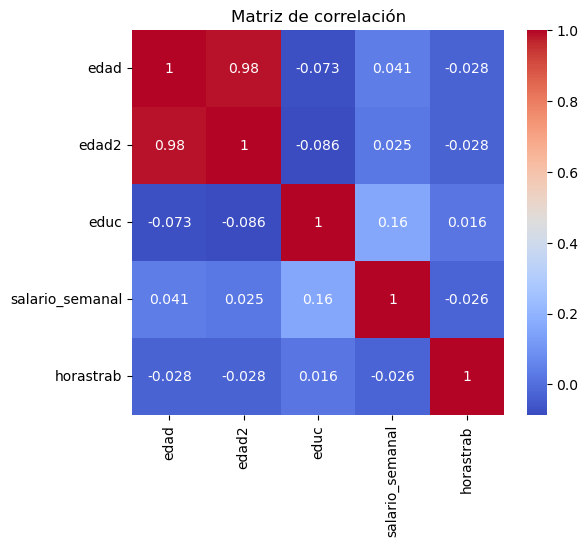

In [307]:
# Creando el gráfico
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_variables = df_combinado[variables]
matriz_corr = df_variables.corr()

# Gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [322]:
# PARTE II- EJERCICIO 2

Cargas (loadings) de cada variable en los primeros dos componentes:
                      PC1       PC2
edad             0.701821  0.044171
edad2            0.702261  0.026882
educ            -0.107917  0.687892
salario_semanal  0.030276  0.721414
horastrab       -0.041405 -0.060770


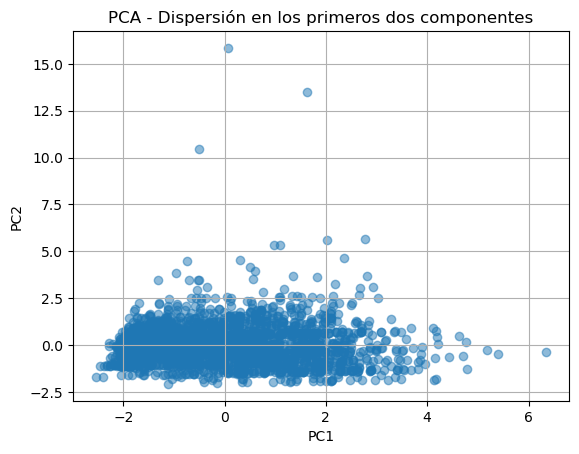

In [335]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Eliminar filas con NaN en las variables necesarias
cols = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_2024 = df_2024.dropna(subset=cols)
df_2004 = df_2004.dropna(subset=cols)

# Agregar columna año y unir
df_2024['año'] = 2024
df_2004['año'] = 2004
df_combinado = pd.concat([df_2024, df_2004], ignore_index=True)

# Aplicar PCA en variables
X = df_combinado[['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']]
X_std = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)

# (loadings) de cada variable en PC1 y PC2
features = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
loadings = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])

# Mostrar solo los dos primeros componentes
print("Cargas (loadings) de cada variable en los primeros dos componentes:")
print(loadings[['PC1', 'PC2']])

# Gráfico de dispersión
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Dispersión en los primeros dos componentes')
plt.grid()
plt.show()

In [329]:
# PARTE II - EJERCICIO 3

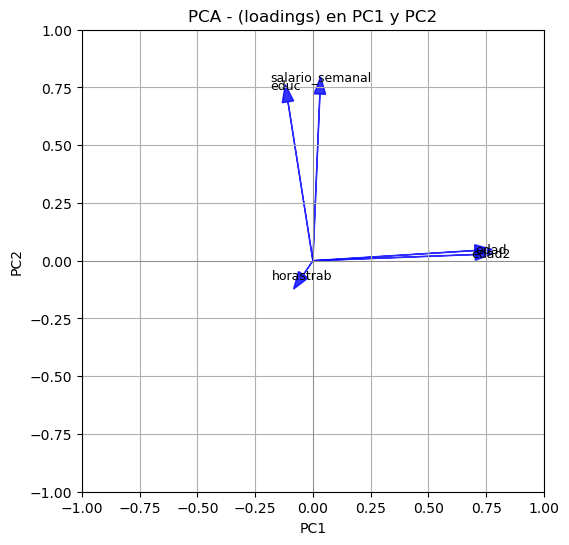

In [337]:
import numpy as np

# Variables originales
features = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# Coordenadas de los loadings en el espacio PC1 vs PC2
loadings = pca.components_.T[:, :2]  # columnas: PC1 y PC2

plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Dibujar flechas
for i, var in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='blue', alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var,
             color='black', ha='center', va='center', fontsize=9)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - (loadings) en PC1 y PC2")
plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.show()